In [2]:
#READ_CSV, READ_TEXT, Import Pandas, os

import pandas as pd
import os

def read_csv(path):
    df = pd.read_csv(path, encoding='unicode_escape')
    df['PersonID'] = os.path.split(path)[1].split('_')[0][6:]
    df['ImageID'] = os.path.split(path)[1].split('.')[0][6:]
    return df

#只有 Text 跟 Caption 會用
def read_text(path, colName):
    df = pd.read_csv(path, sep='\t', encoding='unicode_escape', names=[colName])
    filename = os.path.split(path)[1]
    if 'text' in filename:
        df['TextID'] = filename[6:-4]
    else:
        df['ImageID'] = os.path.split(path)[1].split('.')[0][6:-7]
    return df

def load_FineData():
    return pd.read_csv('FineData.csv', encoding='unicode_escape')


In [2]:
#Reading all file

DataPath = 'MC2-Image-Data/'

#Full DataPaths
CsvList = []
#ImageList = [] 
CapList = [] 
TextList = []

#ImagesNames = []

for r, d, files in os.walk(DataPath):

    if 'TrainingImages' in r:
            continue

    for _file in files:

        if _file.endswith('.csv'):
            CsvList.append(r + '/' + _file)
        #elif _file.endswith('.jpg'):
        #    ImageList.append(r + '/' +_file)
        #    ImagesNames.append(_file)
        elif 'caption.txt' in _file:
            CapList.append(r + '/' +_file)
        elif 'text' in _file:
            TextList.append(r + '/' +_file)

In [3]:
# Make Caption/Text/Csv DataFrame

tmp = []
for path in CapList:
    tmp.append(read_text(path, 'Caption'))

cap_df = pd.concat(tmp, ignore_index=True)

tmp = []
for path in TextList:
    tmp.append(read_text(path, 'Text'))

text_df = pd.concat(tmp, ignore_index=True)

tmp = []
for path in CsvList:
    tmp.append(read_csv(path))

csv_df = pd.concat(tmp, ignore_index=True)

In [4]:
# Sort by Simply ImageID
csv_df['Sort'] = csv_df['ImageID'].apply(lambda x : int(x.replace('_', ""))) 
csv_df = csv_df.sort_values(by='Sort', ignore_index=True)
csv_df = csv_df.drop(columns = ['Sort'])
csv_df



,x,y,Width,Height,Score,Label,PersonID,ImageID
0,1479,11,1922,1583,0.33861,birdCall,1,1_1
1,2554,313,955,888,0.28139,eyeball,1,1_1
2,1855,1724,578,1079,0.34569,pinkCandle,1,1_1
3,14,666,1465,2309,0.42683,pumpkinNotes,1,1_1
4,1560,1301,1197,615,0.32564,blueSunglasses,1,1_1
...,...,...,...,...,...,...,...,...
4486,1055,795,1953,1602,0.30762,birdCall,40,40_10
4487,1884,1176,985,1291,0.30588,cloudSign,40,40_10
4488,847,1556,1590,1544,0.58092,redWhistle,40,40_10
4489,1279,957,1521,1371,0.48834,hairClip,40,40_10


In [5]:
# Save Files
csv_df.to_csv('FineData.csv', encoding='unicode_escape')
csv_df


,x,y,Width,Height,Score,Label,PersonID,ImageID
0,1479,11,1922,1583,0.33861,birdCall,1,1_1
1,2554,313,955,888,0.28139,eyeball,1,1_1
2,1855,1724,578,1079,0.34569,pinkCandle,1,1_1
3,14,666,1465,2309,0.42683,pumpkinNotes,1,1_1
4,1560,1301,1197,615,0.32564,blueSunglasses,1,1_1
...,...,...,...,...,...,...,...,...
4486,1055,795,1953,1602,0.30762,birdCall,40,40_10
4487,1884,1176,985,1291,0.30588,cloudSign,40,40_10
4488,847,1556,1590,1544,0.58092,redWhistle,40,40_10
4489,1279,957,1521,1371,0.48834,hairClip,40,40_10


In [17]:
# Load csv
Df = load_FineData()
Df

,Unnamed: 0,x,y,Width,Height,Score,Label,PersonID,ImageID
0,0,1479,11,1922,1583,0.33861,birdCall,1,1_1
1,1,2554,313,955,888,0.28139,eyeball,1,1_1
2,2,1855,1724,578,1079,0.34569,pinkCandle,1,1_1
3,3,14,666,1465,2309,0.42683,pumpkinNotes,1,1_1
4,4,1560,1301,1197,615,0.32564,blueSunglasses,1,1_1
...,...,...,...,...,...,...,...,...,...
4486,4486,1055,795,1953,1602,0.30762,birdCall,40,40_10
4487,4487,1884,1176,985,1291,0.30588,cloudSign,40,40_10
4488,4488,847,1556,1590,1544,0.58092,redWhistle,40,40_10
4489,4489,1279,957,1521,1371,0.48834,hairClip,40,40_10


In [18]:
# Find PCA and Save result
import numpy as np
from sklearn import preprocessing
from sklearn import decomposition

pivot = Df.pivot(index='ImageID', columns='Label', values='Score').fillna(0.0).astype(np.float)
pivot.shape

target = pd.DataFrame(pivot.index)

X = pivot.to_numpy()
X = preprocessing.scale(X)

pca = decomposition.PCA(n_components=2)
X_r = pca.fit_transform(X)

pca_df = pd.DataFrame(X_r, columns=['PCA1', 'PCA2'])
pca_df.head()

pca_df.to_csv('PCA.csv', encoding='unicode_escape')




In [19]:
# Concat Target and PCA
res = pd.concat([target,pca_df], axis=1)
res




,ImageID,PCA1,PCA2
0,10_1,0.254676,-1.396330
1,10_10,-1.037732,1.150655
2,10_11,-0.918987,1.096559
3,10_12,0.309343,-0.380384
4,10_13,-1.293856,-1.746674
...,...,...,...
889,9_5,-1.313219,-1.118947
890,9_6,-0.164859,0.765082
891,9_7,0.913829,1.368372
892,9_8,3.071244,0.648301


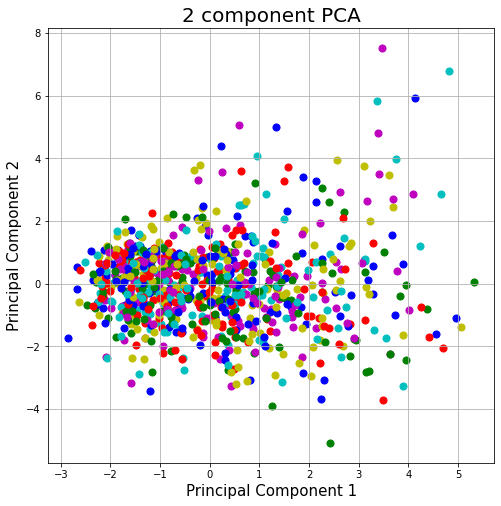

In [20]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
# targets = ['birdCall',
#     'blueSunglasses',
#     'canadaPencil',
#     'cloudSign',
#     'cupcakePaper',
#     'eyeball',
#     'hairClip',
#     'lavenderDie',
#     'metalKey',
#     'noisemaker',
#     'paperPlate',
#     'partyFavor',
#     'pinkCandle',
#     'pumpkinNotes',
#     'redWhistle',
#     'sign',
#     'silverStraw',
#     'stickerBox',
#     'trophy',
#     'vancouverCards',
#     'yellowBag',
#     'yellowBalloon']
targets = target['ImageID']

colors = ['r', 'g', 'b', 'c','m','y'] * 149
#           ,'w','gray','rosybrown','firebrick',
#           'darksalmon','sienna','sandybrown','bisque','tan', 'moccasin', 
#           'gold', 'darkkhaki', 'olivedrab', 'chartreuse','darkgreen','darkcyan'] * 
for target, color in zip(targets,colors):
    indicesToKeep = res['ImageID'] == target
    ax.scatter(res.loc[indicesToKeep, 'PCA1']
               , res.loc[indicesToKeep, 'PCA2']
               , c = color
               , s = 50)
# ax.legend(targets)
ax.grid()